In [5]:
import pandas as pd
import os

from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
from joblib import dump



In [8]:
import skimage as ski
print(ski.__version__)

0.19.3


In [ ]:
# prompt: install skimage 0.19.3

!pip install --upgrade scikit-image==0.19.3


In [ ]:
drive.mount('/content/drive')

source_dir = "/content/drive/MyDrive/Quality"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

Categories=['Local Market Quality',"can't use"]
flat_data_arr=[] #input array
target_arr=[] #output array
datadir=source_dir
#path which contains all the categories of images
for i in Categories:

    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

FileNotFoundError: [Errno 2] No such file or directory: "/content/drive/MyDrive/Quality/can't use"

In [ ]:
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(131, 67501)

In [ ]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [ ]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=77,
                                               stratify=y)

In [ ]:
# Convert DataFrame to NumPy array
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

# Reshape x_train to have rank 4
x_train = x_train.reshape(-1, 150, 150, 3)

In [ ]:
# Data augmentation

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Fit the data generator
datagen.fit(x_train)

In [ ]:
x_train_flattened = x_train.reshape(x_train.shape[0], -1)


# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [ ]:
model.fit(x_train_flattened, y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [ ]:
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 96.29629629629629% accurate


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Local Market Quality',"can't use"]))


                      precision    recall  f1-score   support

Local Market Quality       0.96      1.00      0.98        23
           can't use       1.00      0.75      0.86         4

            accuracy                           0.96        27
           macro avg       0.98      0.88      0.92        27
        weighted avg       0.96      0.96      0.96        27



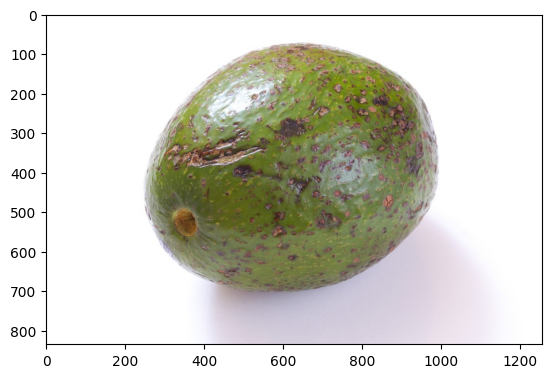

Local Market Quality = 34.79869683506681%
can't use = 65.2013031649332%
The predicted image is : can't use


In [ ]:

path="/content/drive/MyDrive/qqqq.jpg"
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

In [ ]:

# Save the trained model
dump(model, '/content/drive/My Drive/Avocado_quality.joblib')

['/content/drive/My Drive/Avocado_quality.joblib']